In [102]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import widgets

Parameters:

In [103]:
l1 = 0
h1 = 2
l2 = 1
h2 = 3

beta = 0.5

Computations and functions:

In [107]:
frontier = 'empty'

p2_star = (l2-l1)/(h2-l1)
p2_star_star = (l2-l1)/(h2-l2)

p1_star = {'l2<h1':{'a1':beta/(beta + (1-beta)*(h2-h1)/(h2-l1)), 'a2':beta/(beta + (1-beta)*(h2-h1)/(h2-l2))}, \
        'l2>h1':{'a1':0, 'a2':1}}
Delta = beta *(1-beta) *(h2-h1) *(h2-l2) /(h2-l1) /(h2-beta*l2-(1-beta)*h1)

def Ml1(p2):
    return beta*max(l2, (1-p2)*l1 + p2*h2)

def Mh1(p2):
    return beta*max(l2, (1-p2)*h1 + p2*h2)

def Ml2(p1):
    return (1-beta)*max(l2, (1-p1)*l2 + p1*h1)

def Mh2(p1):
    return (1-beta)*h2

def payoffs1(p1, p2, allocation, h_share):
    Welfare = (1-p1)*(1-p2)*(l2 + allocation['l1']['l2']*(l1-l2)) 
    Welfare += (1-p1)*p2*(h2 + allocation['l1']['h2']*(l1-h2)) 
    Welfare += p1*(1-p2)*(l2 + allocation['h1']['l2']*(h1-l2)) 
    Welfare += p1*p2*(h2 + allocation['h1']['h2']*(h1-h2))
    ql2 = (1-p1)*(1-allocation['l1']['l2']) + p1*(1-allocation['h1']['l2'])
    L2 = Ml2(p1)
    H2 = max(Mh2(p1), L2 + ql2*(h2-l2))
    Welfare1 = Welfare - (1-p2)*L2 - p2*H2
    if h_share == 0:
        ql1 = (1-p2)*allocation['l1']['l2'] + p2*allocation['l1']['h2']
        L1 = Welfare1 - p1*ql1*(h1-l1)
        H1 = L1 + ql1*(h1-l1)
    else: 
        qh1 = (1-p2)*allocation['h1']['l2'] + p2*allocation['h1']['h2']
        L1 = Welfare1 - p1 * qh1 * (h1-l1)
        H1 = L1 + qh1*(h1-l1)
        
    return [L1, H1, L2, H2, Welfare]

def payoffs2(p1, p2, allocation, h_share):
    Welfare = (1-p1)*(1-p2)*(l2 + allocation['l1']['l2']*(l1-l2)) 
    Welfare += (1-p1)*p2*(h2 + allocation['l1']['h2']*(l1-h2)) 
    Welfare += p1*(1-p2)*(l2 + allocation['h1']['l2']*(h1-l2)) 
    Welfare += p1*p2*(h2 + allocation['h1']['h2']*(h1-h2))
    ql1 = (1-p2)*allocation['l1']['l2'] + p2*allocation['l1']['h2']
    qh1 = (1-p2)*allocation['h1']['l2'] + p2*allocation['h1']['h2']
    ql2 = (1-p1)*(1-allocation['l1']['l2']) + p1*(1-allocation['h1']['l2'])
    qh2 = (1-p1)*(1-allocation['l1']['h2']) + p1*(1-allocation['h1']['h2'])
    L1 = Ml1(p2)
    H1 = Mh1(p2)
    Welfare2 = Welfare - (1-p1)*L1 - p1*H1
    if h_share == 0:
        L2 = Welfare2 - p2 * ql2 * (h2-l2)
        H2 = L2 + ql2 * (h2-l2)
    else: 
        L2 = Welfare2 - p2 * qh2 * (h2-l2)
        H2 = L2 + qh2 * (h2-l2)
        
    return [L2, H2, L1, H1, Welfare]

def line_intersection(line1, line2):
    xdiff = np.array([line1[0][0] - line1[1][0], line2[0][0] - line2[1][0]])
    ydiff = np.array([line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('Lines do not intersect')

    d = (det(*line1), det(*line2))
    x0 = det(d, xdiff) / div
    x1 = det(d, ydiff) / div
    return [x0, x1]

Plot module

In [110]:
def plot_mechanism(p1, p2, mechanism='a2', case = 'l2<h1'):

    global frontier

    p1star = p1_star[case][mechanism]
    p2star = p2_star

    if abs(p1-p1star)<0.03:
        p1 = p1star
    if abs(p2-p2star)<0.03:
        p2 = p2star
    
    plt.figure(figsize=(12,5))

    # Sine plot
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    ax = plt.gca()  # Get current axes
    square = patches.Rectangle((0, 0), 1, 1, fill=False)
    ax.add_patch(square)
    if mechanism == 'a2':
        plt.axvline(x=p1star, color='grey', linestyle='-')
        plt.plot([0, p1star], [p2star, p2star], color='grey', linestyle='-')
    else:
        plt.plot([p1star, p1star], [1, p2star], color='grey', linestyle='-')
        plt.plot([0, 1], [p2star, p2star], color='grey', linestyle='-')
    plt.text(-0.05, p2star, '$p^{*}_2$', horizontalalignment='center', verticalalignment='center')
    plt.axvline(x=p1, color='grey', linestyle='--')
    plt.axhline(y=p2, color='grey', linestyle='--')
    plt.plot(p1, p2, marker='o', color='blue')
    plt.title(f"Belief space")
    plt.xlim(0, 1)  # Limit x-axis from 0 to 1
    plt.ylim(0, 1)  # Limit y-axis from 0 to 1

    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    big_gap = 0.05
    gap = 0.02
    plt.title(f"Payoffs in mechanism {mechanism}")
    # Remove tick markks and axis
    ax = plt.gca()  # Get current axes
    ax.axis('off')
    
    #Draw axis lines
    if mechanism == 'a2':
        L0 = Ml1(p2)
        H0 = Mh1(p2)
        LMax = L0 + Delta/(1-p1star)
        HMax = H0 + Delta/p1star
        Llabel = '$\\beta M_1(l_1|p_2)$'
        Hlabel = '$\\beta M_1(h_1|p_2)$'
        title = f"Player 1 payoffs"
    else:
        L0 = Ml2(p1)
        H0 = Mh2(p1)
        LMax = L0 + Delta/(1-p2star)
        HMax = H0 + Delta/p2star
        Llabel = '$(1-\\beta) M_2(l_2|p_1)$'
        Hlabel = '$(1-\\beta) M_2(h_2|p_1)$'
        title = f"Player 2 payoffs"
    plt.plot([L0, LMax], [H0, H0], color='black', linestyle='-')
    plt.plot([L0, L0], [H0, HMax], color='black', linestyle='-')

    plt.text(L0-gap, H0, Llabel, horizontalalignment='right', verticalalignment='center')
    
    plt.text(L0, H0-gap, Hlabel, horizontalalignment='center', verticalalignment='center')
    
    #Draw the Pareto frontier
    if frontier != 'empty':
        plt.plot(frontier[0], frontier[1], color='lightgrey', linestyle=':')
    if mechanism == 'a2':
        if p2>p2star:
            share = max(beta*(1-(1-p1star)/p1star*p1/(1-p1)), 0)
        else:
            share = 0
        x = payoffs1(p1, p2, {'l1':{'l2':share, 'h2':0}, 'h1':{'l2':1, 'h2':0}}, 0)
        y = payoffs1(p1, p2, {'l1':{'l2':share, 'h2':0}, 'h1':{'l2':1, 'h2':0}}, 1)
        plt.plot([x[0], y[0]], [x[1], y[1]], color='black', linestyle='--')
        plt.plot(x[0], x[1], marker='o', color='grey')
        plt.plot(y[0], y[1], marker='o', color='grey')
        line=[x, y]
        lineX = [[L0,H0],[LMax,H0]]
        lineY = [[L0,H0],[L0,HMax]]
        iX = line_intersection(line, lineX)
        iY = line_intersection(line, lineY)
        if p1<=p1star:
            plt.plot(iY[0], iY[1], marker='o', color='blue')
        if p1>=p1star:
            plt.plot(iX[0], iX[1], marker='o', color='blue')
        if p1==p1star:
            plt.plot([iX[0], iY[0]], [iX[1], iY[1]], color='blue', linestyle='-')
            frontier = [[iX[0], iY[0]], [iX[1], iY[1]]]
    else:
        x = payoffs2(p1, p2, {'l1':{'l2':1, 'h2':0}, 'h1':{'l2':1, 'h2':0}}, 0)
        y = payoffs2(p1, p2, {'l1':{'l2':0, 'h2':0}, 'h1':{'l2':1, 'h2':0}}, 0)
        z = payoffs2(p1, p2, {'l1':{'l2':0, 'h2':0}, 'h1':{'l2':1, 'h2':0}}, 1)
        plt.plot([x[0], y[0], z[0]], [x[1], y[1], z[1]], color='black', linestyle='--')
        plt.plot(x[0], x[1], marker='o', color='grey')
        plt.plot(y[0], y[1], marker='o', color='grey')
        plt.plot(z[0], z[1], marker='o', color='grey')
        lineXY=[x, y]
        lineYZ=[y, z]
        lineX = [[L0,H0],[LMax,H0]]
        lineY = [[L0,H0],[L0,HMax]]
        iX = line_intersection(lineX, lineXY)
        iY = line_intersection(lineY, lineYZ)
        if p2<=p2star:
            plt.plot(iY[0], iY[1], marker='o', color='blue')
        if p2>=p2star:
            plt.plot(iX[0], iX[1], marker='o', color='blue')
        if p2==p2star:
            plt.plot([iX[0], y[0], iY[0]], [iX[1], y[1], iY[1]], color='blue', linestyle='-')
            frontier = [[iX[0], y[0], iY[0]], [iX[1], y[1], iY[1]]]
    
    plt.title(title)

    #Limit the plot
    plt.xlim(L0-big_gap, LMax+big_gap)  # Limit x-axis from 0 to 1
    plt.ylim(H0-big_gap, HMax+big_gap)  # Limit y-axis from 0 to 1
    
    plt.show()

Output()

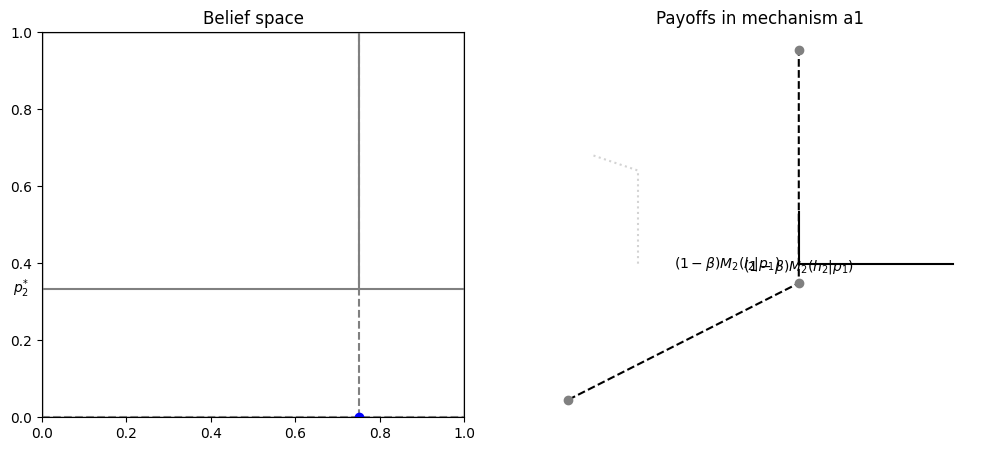

In [111]:
# Slider widgets
p1_slider = widgets.FloatSlider(value=0.3, min=0.001, max=0.999, step=0.01, description='p1:', layout=widgets.Layout(width='400px'))
p2_slider = widgets.FloatSlider(value=0.2, min=0, max=1, step=0.01, description='p2:', layout=widgets.Layout(width='400px'))

mechanism_selector = widgets.RadioButtons(
    options=['a1', 'a2'],  # Replace with your actual mechanism options
    description='Mechanism:',
    value = 'a1',
    disabled=False,
    layout=widgets.Layout(flex_flow='row')  # Set layout to horizontal
)

# Using interact but with custom widget layout
ui = widgets.HBox([p1_slider, p2_slider, mechanism_selector])
out = widgets.interactive_output(plot_mechanism, {'p1': p1_slider, 'p2': p2_slider, 'mechanism': mechanism_selector})

# Display layout
display(ui, out)